# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [8]:
df = pd.read_csv('/content/winequality-red.csv')

# Menampilkan 5 baris data
print("5 baris awal dataset:")
print(df.head())

print("\nDataset Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

5 baris awal dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5 

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


--- Distribusi Variabel Target (Quality) ---


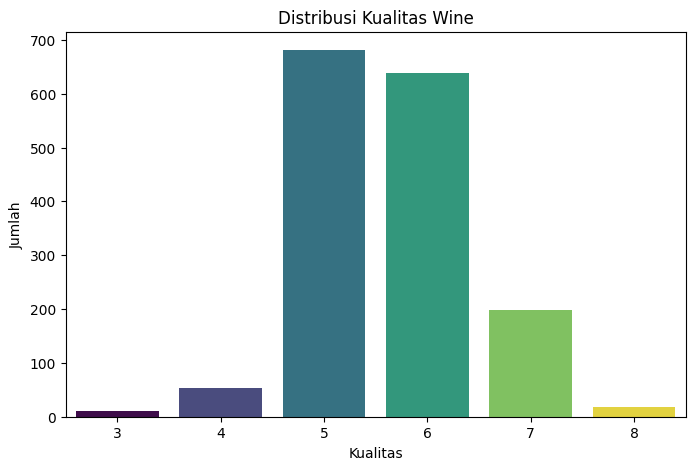


--- Korelasi Antar Fitur ---


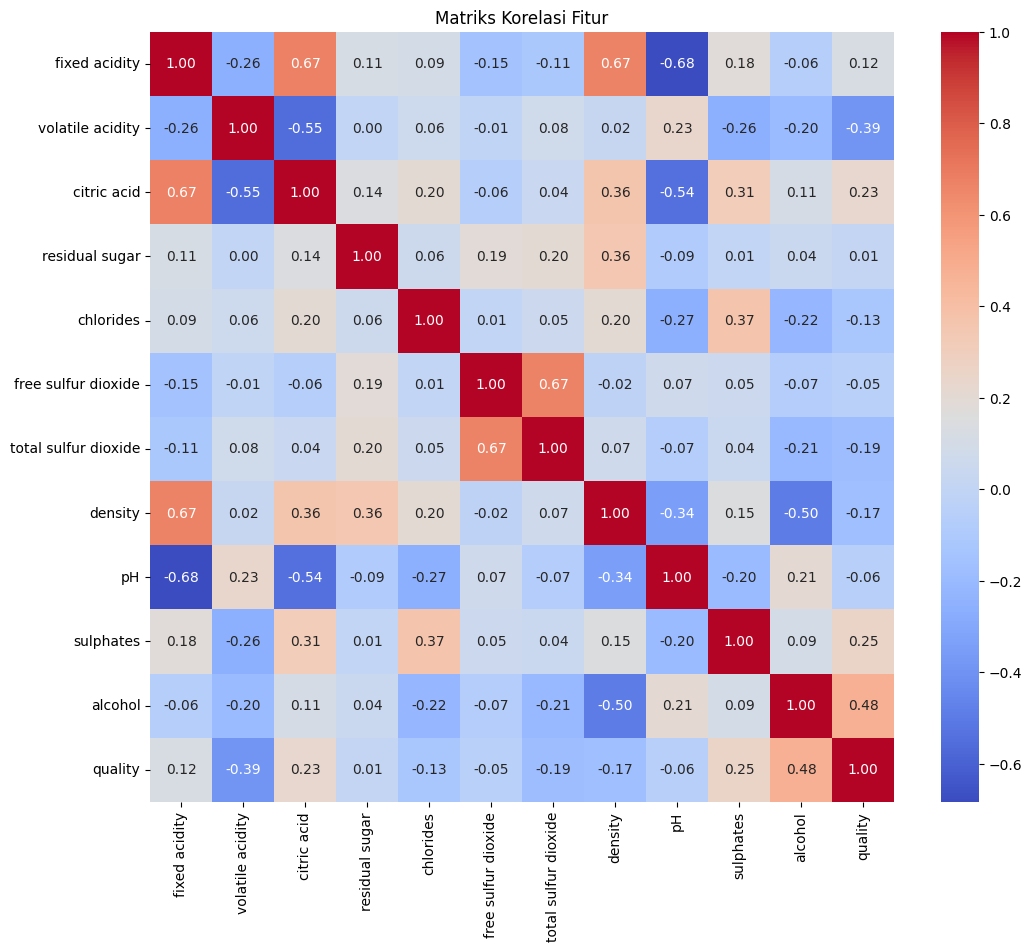


--- Distribusi Setiap Fitur ---


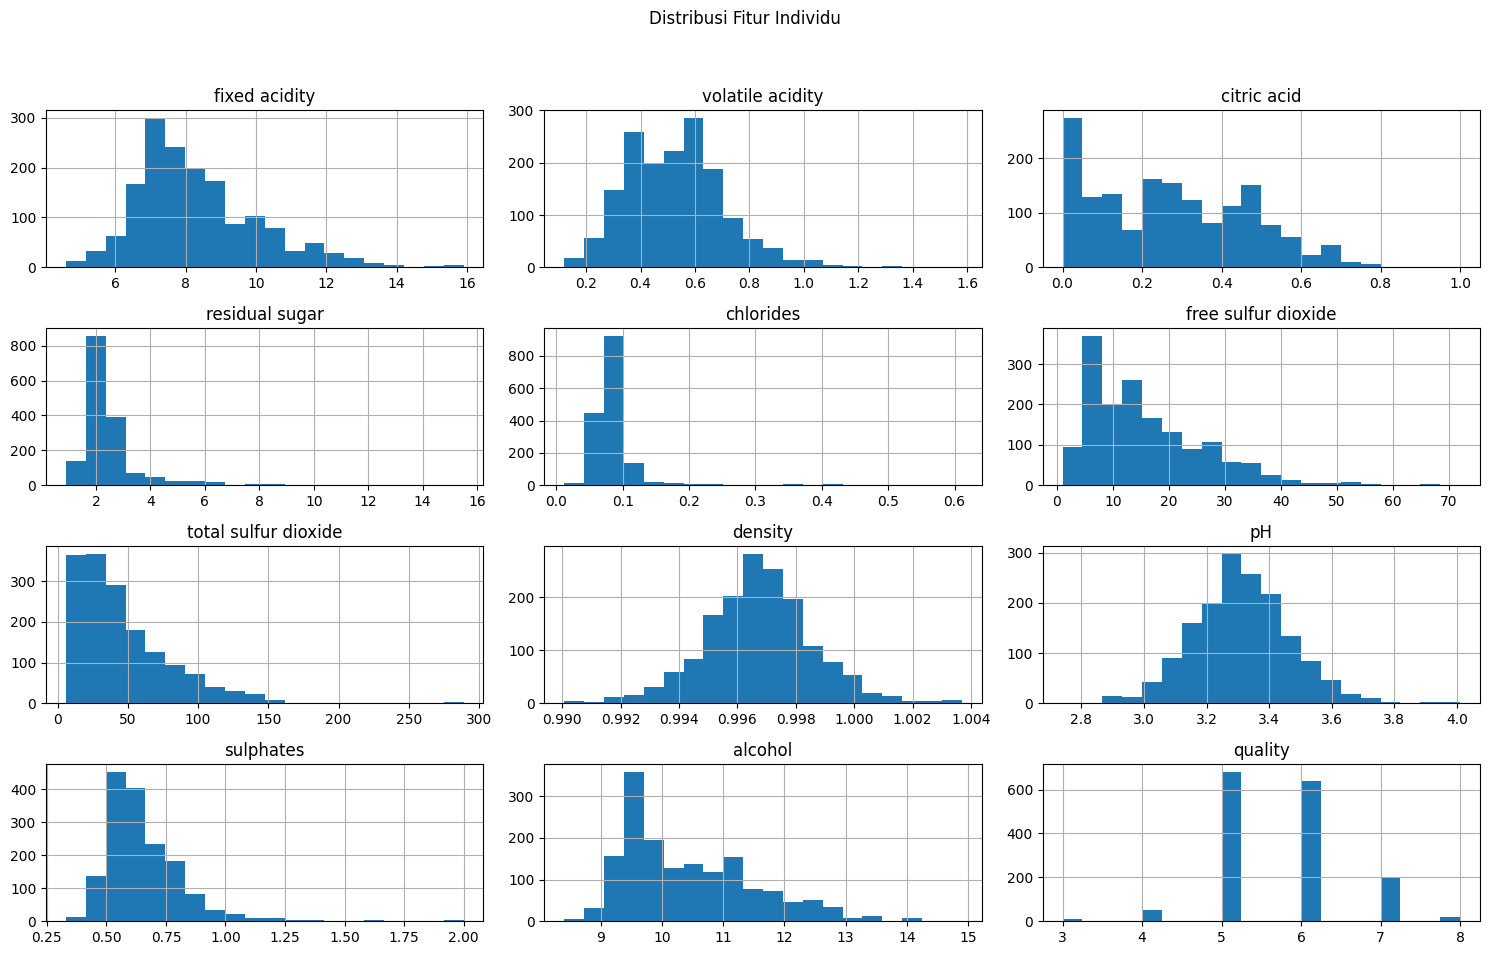

In [9]:
print("\n--- Distribusi Variabel Target (Quality) ---")
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis', hue='quality', legend=False)
plt.title('Distribusi Kualitas Wine')
plt.xlabel('Kualitas')
plt.ylabel('Jumlah')
plt.show()

print("\n--- Korelasi Antar Fitur ---")
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur')
plt.show()

print("\n--- Distribusi Setiap Fitur ---")
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribusi Fitur Individu')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
print("Jumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang per kolom:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [11]:
print("Jumlah baris duplikat sebelum penghapusan:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Jumlah baris duplikat setelah penghapusan:", df.duplicated().sum())


Jumlah baris duplikat sebelum penghapusan: 240
Jumlah baris duplikat setelah penghapusan: 0


In [12]:
print("\n--- Penanganan Outlier menggunakan IQR ---")
outlier_count = {}

for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count[column] = len(outliers)

        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for column, count in outlier_count.items():
    print(f"Jumlah outlier yang ditangani di kolom '{column}': {count}")

print("\nDataset setelah penanganan outlier:")
print(df.describe())


--- Penanganan Outlier menggunakan IQR ---
Jumlah outlier yang ditangani di kolom 'fixed acidity': 41
Jumlah outlier yang ditangani di kolom 'volatile acidity': 19
Jumlah outlier yang ditangani di kolom 'citric acid': 1
Jumlah outlier yang ditangani di kolom 'residual sugar': 126
Jumlah outlier yang ditangani di kolom 'chlorides': 87
Jumlah outlier yang ditangani di kolom 'free sulfur dioxide': 26
Jumlah outlier yang ditangani di kolom 'total sulfur dioxide': 45
Jumlah outlier yang ditangani di kolom 'density': 35
Jumlah outlier yang ditangani di kolom 'pH': 28
Jumlah outlier yang ditangani di kolom 'sulphates': 55
Jumlah outlier yang ditangani di kolom 'alcohol': 12
Jumlah outlier yang ditangani di kolom 'quality': 27

Dataset setelah penanganan outlier:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.284069          0.527840     0.272288        2.324099   
std         1.658319